In [94]:
import matplotlib.pyplot as plt #đặt tên viết tắt
import pandas as pd  

df = pd.read_csv("D:\hnhi\DE AN\IMDB_Movies_Dataset.csv")
    #BẤT KỲ THAY ĐỔI NÀO TRÊN df CHỈ ẢNH HƯỞNG ĐẾN DataFrame TRONG BỘ NHỚ
        #FILE csv GỐC VẪN GIỮ NGUYÊN 

df.head(3)

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",nan,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes


In [95]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [96]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 12 columns):
Title                4989 non-null object
Average Rating       4989 non-null float64
Director             4989 non-null object
Writer               4988 non-null object
Metascore            3055 non-null float64
Cast                 4982 non-null object
Release Date         4989 non-null object
Country of Origin    4986 non-null object
Languages            4968 non-null object
Budget               2651 non-null object
Worldwide Gross      3895 non-null object
Runtime              4989 non-null object
dtypes: float64(2), object(10)
memory usage: 467.8+ KB


,Average Rating,Metascore
count,4989.0,3055.0
mean,7.6,74.7
std,0.4,12.3
min,7.2,25.0
25%,7.3,67.0
50%,7.6,76.0
75%,7.8,84.0
max,9.3,100.0


# DATA CLEANING

### PHÂN LOẠI CÁC CỘT

In [97]:
# HÀM PHÂN LOẠI CÁC CỘT THEO KIỂU DỮ LIỆU VÀ LƯỢNG GIÁ TRỊ DUY NHẤT
def get_cols_names(df: pd.DataFrame, cat_threshold: int = 10, car_threshold: int = 20):
    
    # BƯỚC 1: TÁCH CÁC CỘT THEO KIỂU DỮ LIỆU
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    num_cols = df.select_dtypes(exclude=["object"]).columns.tolist()
        # cat_cols: chứa các cột kiểu object → thường là dạng chuỗi (categorical).
        # num_cols: chứa các cột còn lại (kiểu số, float, int...).

    # BƯỚC 2: tÌM CỘT KIỂU OBJECT NHƯNG CÓ QUÁ NHIỀU GIÁ TRỊ KHÁC NHAU
    cat_but_car_cols = [col for col in cat_cols if df[col].nunique() > car_threshold]
        # categorical but cardinal → mặc dù kiểu object, nhưng có quá nhiều giá trị khác nhau (unique values).
    
    # BƯỚC 3: TÌM CỘT KIỂU SỐ NHƯNG CÓ QUÁ ÍT GIÁ TRỊ KHÁC NHAU -> CÓ THỂ XEM NHƯ CATEGORICAL
    num_but_cat_cols = [col for col in num_cols if df[col].nunique() < cat_threshold]
        # Ví dụ: cột rating chỉ có giá trị từ 1 đến 5, dù là số, nhưng có thể xem như categorical.

    # BƯỚC 4: CẬP NHẬT LẠI CÁC DANH SÁCH
    # Combining(ket hop) categorical features and excluding(loai tru categorical but cardinal features
    cat_cols += num_but_cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car_cols]
        # Bổ sung num_but_cat_cols vào cat_cols.
        # Loại bỏ các cột thuộc dạng cardinal khỏi danh sách categorical.

    # Loại bỏ những cột số được xem là danh mục khỏi danh sách num_cols.
    # Exluding numeric-looking categorical features from numeric
    num_cols = [col for col in num_cols if col not in num_but_cat_cols]

    return cat_cols, num_cols, num_but_cat_cols, cat_but_car_cols


# IN RA CÁC CỘT
def print_cols_summary(cat_cols, num_cols, num_but_cat_cols=None, cat_but_car_cols=None):
    print(f"Categorical columns (bao gồm cả những cột số trông giống categorical columns): {cat_cols}\n\nTrong số đó, các cột số nhưng trông như phân loại: {num_but_cat_cols}\n")
    print("-" * 50)
    print(f"\nNumeric columns: {num_cols}\n")
    print("-" * 50)
    print(f"\nCategorical but cardinal columns (Các cột phân loại nhưng có quá nhiều giá trị khác nhau (cardinal)):\n {cat_but_car_cols}\n")
    print("-" * 50)

    for col in cat_cols:
        print(f"\n'Cột {col}' chứa {df[col].nunique()} giá trị duy nhất: {df[col].unique().tolist()}")

    print("\n", "-" * 50)
    
    for col in num_cols:
        print(f"\n'Cột {col}' có giá trị nằm trong khoảng từ {df.describe().loc['min', col]} đến {df.describe().loc['max', col]}")

    print("\n", "-" * 50)
    for col in cat_but_car_cols:
        print(f"\n'Cột {col}' có tổng cộng {df[col].nunique()} giá trị duy nhất.")

cat_cols, num_cols, num_but_cat_cols, cat_but_car_cols = get_cols_names(df)
print_cols_summary(cat_cols, num_cols, num_but_cat_cols, cat_but_car_cols)

Categorical columns (bao gồm cả những cột số trông giống categorical columns): []

Trong số đó, các cột số nhưng trông như phân loại: []

--------------------------------------------------

Numeric columns: ['Average Rating', 'Metascore']

--------------------------------------------------

Categorical but cardinal columns (Các cột phân loại nhưng có quá nhiều giá trị khác nhau (cardinal)):
 ['Title', 'Director', 'Writer', 'Cast', 'Release Date', 'Country of Origin', 'Languages', 'Budget', 'Worldwide Gross', 'Runtime']

--------------------------------------------------

 --------------------------------------------------

'Cột Average Rating' có giá trị nằm trong khoảng từ 7.2 đến 9.3

'Cột Metascore' có giá trị nằm trong khoảng từ 25.0 đến 100.0

 --------------------------------------------------

'Cột Title' có tổng cộng 4927 giá trị duy nhất.

'Cột Director' có tổng cộng 2648 giá trị duy nhất.

'Cột Writer' có tổng cộng 4422 giá trị duy nhất.

'Cột Cast' có tổng cộng 4981 giá trị 

In [98]:
#ĐẾM SỐ LƯỢNG DÒNG BỊ TRÙNG LẶP (k bao gồm dòng đầu tiên của nhóm lặp)
df.duplicated().sum() 


0

In [99]:
# ĐẾM SỐ LƯỢNG DÒNG BỊ THIẾU DỮ LIỆU
df.isna().sum() 

Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2338
Worldwide Gross      1094
Runtime                 0
dtype: int64

In [100]:
#xóa dòng bị thiếu dữ liệu
df = df.dropna() 

 
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 4976
Data columns (total 12 columns):
Title                1926 non-null object
Average Rating       1926 non-null float64
Director             1926 non-null object
Writer               1926 non-null object
Metascore            1926 non-null float64
Cast                 1926 non-null object
Release Date         1926 non-null object
Country of Origin    1926 non-null object
Languages            1926 non-null object
Budget               1926 non-null object
Worldwide Gross      1926 non-null object
Runtime              1926 non-null object
dtypes: float64(2), object(10)
memory usage: 195.6+ KB


In [101]:
df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000 (estimated)","$1,009,053,678",2 hours 32 minutes


### XỬ LÝ DỮ LIỆU TIỀN TỆ Ở CỘT Budget VÀ Worldwide Gross

    BƯỚC 1: XÓA (estimated)

In [102]:
df.Budget = df.Budget.str.replace(r"\s*\(estimated\)","", regex = True)
'''
DÙNG .str.replace() ĐỂ THAY THẾ NỘI DUNG TRONG CHUỖI
        r"\s*\(estimated\)": BIỂU THỨC ĐỂ TÌM VÀ XÓA CỤM " estimated"
            \s* : TÌM KHOẢNG TRẮNG CÓ TRƯỚC estimated (*: NẾU CÓ HAY K CÓ KHOẢNG TRẮNG)
            \(estimated\) = (estimated)
        "": THAY THẾ (estimated) BẰNG CHUỖI RỖNG
        regex = True: CHO PHÉP SỬ DỤNG BIỂU THỨC CHÍNH QUY (REGEX) TRONG REPLACE()
'''
     
print(df[['Title', 'Budget', 'Worldwide Gross']].head(3))

                      Title        Budget Worldwide Gross
0  The Shawshank Redemption   $25,000,000     $29,332,133
2             The Godfather    $6,000,000    $250,342,198
7           The Dark Knight  $185,000,000  $1,009,053,678


        BƯỚC 2: trích xuất đơn vị tiền tệ 

In [103]:
import re
from forex_python.converter import CurrencyRates

''' 
 BIỂU THỨC REGEX(BIỂU THỨC CHÍNH QUY) ĐỂ TÌM KÝ HIỆU TIỀN TỆ
    TỪ MẪU CHUỖI R'([^\D.,\S]+)'
    [^...] CÓ NGHĨA LÀ "KHÔNG CHỨA CÁC KÝ TỰ TRONG DẤU []"
     TÌM CÁC KÝ TỰ KHÔNG PHẢI SỐ, DẤU PHẨY, DẤU CHẤM HOẶC KHOẢNG TRẮNG
    CURRENCY_PATTERN = RE.COMPILE(R'([^\D.,\S]+)')  
    MẪU KÍ HIỆU TIỀN TỆ 
'''


#  HÀM TRÍCH XUẤT LOẠI TIỀN TỆ
def extract_currency(value):
        #ĐẦU VÀO VALUE LÀ KIỂU STRING

        #TÌM KÝ HIỆU TIỀN TỆ ĐẦU TIÊN
    match = re.compile(r'([^\d.,\s]+)').search(value) 
        
        #.SEARCH() DÙNG ĐỂ TÌM LẦN XUẤT HIỆN ĐẦU TIÊN CỦA MỘT MẪU TRONG CHUỖI
            #TRẢ VỀ MỘT OBJECT MATCH NẾU TÌM THẤY, NẾU KHÔNG TÌM THẤY TRẢ VỀ NONE
            #print(extract_currency("1.000,50 VNĐ VNĐ"))  => Kết quả: VNĐ
            #print(extract_currency("100"))        => Kết quả: Unknown
    

        #TRẢ VỀ LOẠI TIỀN HOẶC 'UNKNOWN' NẾU KHÔNG TÌM THẤY
    return match.group(1) if match else "Unknown" 
        #.GROUP()
            #GROUP() HOẶC GROUP(0): LẤY TOÀN BỘ PHẦN KHỚP VỚI MẪU
            #GROUP(1): LẤY NHÓM ĐẦU TIÊN TRONG DẤU () TRONG MẪU
            #KHI REGEX CÓ 1 NHÓM DUY NHẤT ([^\d.,\s]+), THÌ group() VÀ group(1) SẼ TRẢ VỀ CUNG 1 KẾT QUẢ 

        #NẾU DÙNG RETURN MATCH THAY VÌ RETURN MATCH.GROUP(1) 
            #THÌ KẾT QUẢ SẼ LÀ OBJECT MATCH, KP LÀ KÝ HIỆU, K THỂ SỬ DỤNG TRỰC TIẾP
            #ĐỐI TƯỢNG MATCH: <re.Match object; span=(0, 1), match='$'>


# TẠO CÁC CỘT MỚI ĐỂ LUU KÝ HIỆU TIỀN TỆ
df["Budget (Currency)"] = df["Budget"].dropna().apply(extract_currency)
df["Worldwide Gross (Currency)"] = df["Worldwide Gross"].dropna().apply(extract_currency)
    # .APPLY() DÙNG ĐỂ ÁP DỤNG HÀM CHO TỪNG PHẦN TỬ TRONG SERIES
    # DÙNG DROPNA() ĐỂ LOẠI BỎ CÁC Ô TRỐNG TRONG CỘT


# TẠO TẬP HỢP CÁC LOẠI TỀN TỆ XUẤT HIỆN TRONG CẢ 2 CỘT "BUDGET" VÀ "WORLDWIDE GROSS"
unique_currencies = (
                    {extract_currency(value) for value in df["Budget"].dropna()} | 
                    {extract_currency(value) for value in df["Worldwide Gross"].dropna()} 
                    )
    #DÙNG SET ĐỂ LƯU CÁC LOẠI TIỀN TỆ KHÁC NHAU
        #DÙNG SET COMPREHENSION {}: ĐỂ TRÍCH XUẤT TRỰC TIẾP KÝ HIỆU TIỀN TỆ TRONG CỘT "BUDGET" VÀ "WORLDWIDE GROSS"
        #DÙNG DROPNA() ĐỂ LOẠI BỎ CÁC Ô TRỐNG TRONG CỘT
        #DÙNG "|" ĐỂ GỘP 2 SET LẠI VỚI NHAU, TRẢ VỀ 1 SET CHỨA CÁC PHẦN TỬ KHÔNG TRÙNG NHAU
    
    #for value in df["Budget"].dropna(): LẶP QUA TỪNG GIÁ TRỊ TRONG CỘT BUDGET, BỎ QUA GIÁ TRỊ NaN



#  IN KẾT QUẢ
print("CÁC LOẠI TIỀN TỆ CÓ TRONG DỮ LIỆU:", unique_currencies)
# print(type(unique_currencies))
df.head(3)
#print(df1)

# print(df[['Unnamed: 0', 'Title', 'Budget', 'Worldwide Gross', 
#           'Budget (Currency)', 'Worldwide Gross (Currency)']].head(3))

#print(extract_currency("100 VNĐ USD"))

CÁC LOẠI TIỀN TỆ CÓ TRONG DỮ LIỆU: {'₩', 'DEM', '₹', 'SEK', 'FRF', '£', 'FIM', 'BEF', 'CN¥', '$', 'CZK', 'DKK', 'LVL', 'RUR', 'NOK', 'CA$', 'ITL', '¥', '€', 'R$', 'MX$', 'A$', 'NZ$', 'CHF', 'HUF', 'ATS', 'HK$'}


,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Budget (Currency),Worldwide Gross (Currency)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000","$29,332,133",2 hours 22 minutes,$,$
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000","$250,342,198",2 hours 55 minutes,$,$
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",2 hours 32 minutes,$,$


Chuyển đổi ký hiệu tiền tệ thành mã tiền tệ

In [104]:
import pandas as pd
import re 

# Danh sách ký hiệu tiền tệ và mã ISO tương ứng
currency_symbols = {
    "$": "USD", "€": "EUR", "£": "GBP", "¥": "JPY", "₩": "KRW", "₹": "INR", "A$": "AUD", "CA$": "CAD",
    "MX$": "MXN", "HK$": "HKD", "NZ$": "NZD", "SEK": "SEK", "NOK": "NOK", "DKK": "DKK", "CHF": "CHF",
    "CZK": "CZK", "HUF": "HUF", "R$": "BRL", "CN¥": "CNY", "ITL": "ITL", "FRF": "FRF", "DEM": "DEM",
    "BEF": "BEF", "ATS": "ATS", "LVL": "LVL", "FIM": "FIM", "RUR": "RUB"
}

# HÀM ĐỔI KÝ HIỆU TIỀN TỆ THÀNH MÃ TIỀN TỆ
def convert_currency_symbol_to_code(symbol):
    # KIỂM TRA NẾU ĐÃ LÀ MÃ TIỀN TỆ THÌ GIỮ NGUYÊN
    if symbol in currency_symbols.values():
        return symbol
    # Nếu là ký hiệu, đổi sang mã tiền tệ
    return currency_symbols.get(symbol, "Unknown")


# HÀM CẬP NHẬT CÁC CỘT CHỨA KÝ HIỆU TIỀN TỆ THÀNH MÃ TIỀN TỆ 
def update_existing_currency_columns(df):
    # DUYỆT QUA CÁC CỘT CHỨA KÝ HIỆU TIỀN TỆ
    for column in ["Budget (Currency)", "Worldwide Gross (Currency)"]:
        # KIỂM TRA XEM CỘT TỒN TẠI TRONG DATAFRAME KHÔNG 
        if column in df.columns:
            df[column] = df[column].apply(lambda x: convert_currency_symbol_to_code(x) 
                                          if pd.notna(x) else "Unknown")
            # .APPLY() ÁP DỤNG HÀM convert_currency_symbol_to_code(x) LÊN TỪNG GIÁ TRỊ x TRONG CỘT
            # NẾU GIÁ TRỊ x KHÔNG PHẢI NaN, THÌ ÁP DỤNG HÀM convert_currency_symbol_to_code(x)
            # NẾU LÀ NaN, THÌ TRẢ VỀ "Unknown"

    return df 
        # TRẢ VỀ DATAFRAME SAU KHI CẬP NHẬT DỮ LIỆU 

# CẬP NHẬT DỮ LIỆU
df = update_existing_currency_columns(df)

df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Budget (Currency),Worldwide Gross (Currency)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000","$29,332,133",2 hours 22 minutes,USD,USD
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000","$250,342,198",2 hours 55 minutes,USD,USD
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",2 hours 32 minutes,USD,USD


        BƯỚC 3: loại bỏ ký hiệu tiền tệ và dấu phẩy, chuyển đổi sang float

In [105]:
# HÀM LOẠI BỎ KÝ HIỆU TIỀN TỆ, DẤU PHẨY VÀ CHUYỂN ĐỔI GIÁ TRỊ TIỀN TỆ THÀNH SỐ FLOAT
def clean_currency_value(value):
    if pd.isna(value) or value == "Unknown":
        return None  # Giữ NaN nếu dữ liệu trống hoặc không xác định
    
    # Loại bỏ mọi ký tự không phải số, dấu chấm hoặc dấu phẩy (ngoại trừ số âm)
    cleaned_value = re.sub(r"[^\d.-]", "", value)
    
    try:
        return float(cleaned_value)
    except ValueError:
        # LỖI XẢY RA KHI K THỂ CHUYỂN ĐỔI SANG SỐ FLOAT 
        return None  # Nếu không thể chuyển đổi, trả về None
    

# HÀM TẠO CỘT MỚI CHỨA GIÁ TRỊ TIỀN TỆ SAU KHI ĐƯỢC CHUYỂN ĐỔI
def add_numberic_currency_columns(df):
    # TẠO CÁC CỘT MỚI
    df["Budget (Numeric)"] = df["Budget"].apply(clean_currency_value)
    df["Worldwide Gross (Numeric)"] = df["Worldwide Gross"].apply(clean_currency_value)
    
    return df

pd.options.display.float_format = '{:.1f}'.format  
# Hiển thị số có dấu phẩy, giữ 2 chữ số thập phân

df = add_numberic_currency_columns(df)
df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Budget (Currency),Worldwide Gross (Currency),Budget (Numeric),Worldwide Gross (Numeric)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000","$29,332,133",2 hours 22 minutes,USD,USD,25000000.0,29332133.0
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000","$250,342,198",2 hours 55 minutes,USD,USD,6000000.0,250342198.0
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",2 hours 32 minutes,USD,USD,185000000.0,1009053678.0


In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 4976
Data columns (total 16 columns):
Title                         1926 non-null object
Average Rating                1926 non-null float64
Director                      1926 non-null object
Writer                        1926 non-null object
Metascore                     1926 non-null float64
Cast                          1926 non-null object
Release Date                  1926 non-null object
Country of Origin             1926 non-null object
Languages                     1926 non-null object
Budget                        1926 non-null object
Worldwide Gross               1926 non-null object
Runtime                       1926 non-null object
Budget (Currency)             1926 non-null object
Worldwide Gross (Currency)    1926 non-null object
Budget (Numeric)              1926 non-null float64
Worldwide Gross (Numeric)     1926 non-null float64
dtypes: float64(4), object(12)
memory usage: 255.8+ KB
None


        BƯỚC 4: Quy đổi về đơn vị chung (USD)
            1 số đơn vị tiền tệ bị ngừng sử dụng và thay thế bằng EUR nê cần đổi sang EUR vào thời điểm chuyển đổi

            1) Xử lý tiền tệ cũ trước khi thay đổi Currency:
                - Nếu giá trị Currency nằm trong old_currency_to_eur, trước tiên nhân số tiền (Numeric) với tỷ giá EUR tương ứng.
                - Sau đó, thay đổi giá trị Currency thành "EUR".

            2) Gọi API để lấy tỷ giá USD:
                - API chỉ được gọi một lần duy nhất để lấy tỷ giá của các loại tiền tệ hiện tại (đã cập nhật).
                - Thêm tỷ giá EUR/USD vào exchange_rates.

            3) Chuyển đổi sang USD:
                - Dùng exchange_rates để nhân với Numeric, sau đó làm tròn đến 2 chữ số thập phân.
                - Lưu vào các cột mới: Budget (USD) và Worldwide Gross (USD).



In [107]:
currency_set = set(currency_symbols.values())

print(currency_set)

{'KRW', 'FRF', 'MXN', 'CAD', 'FIM', 'BEF', 'JPY', 'CZK', 'NZD', 'DKK', 'LVL', 'BRL', 'ATS', 'DEM', 'SEK', 'CNY', 'NOK', 'GBP', 'HKD', 'INR', 'USD', 'ITL', 'EUR', 'AUD', 'CHF', 'HUF', 'RUB'}


In [108]:
import requests

# Danh sách tỷ giá chuyển đổi từ tiền tệ cũ sang EUR
old_currency_to_eur = {
    "ITL": 0.000513,  # Lira Ý
    "ATS": 0.0726,    # Schilling Áo
    "BEF": 0.02479,   # Franc Bỉ
    "LVL": 1.422,     # Lats Latvia
    "FIM": 0.168,     # Markka Phần Lan
    "DEM": 0.51129,   # Deutsche Mark
    "FRF": 0.15245    # Franc Pháp
}


API_URL = "https://open.er-api.com/v6/latest/"
API_KEY = "1f18a3a7470648024fd69610" 


# 1. Chuyển đổi các loại tiền cũ thành EUR 
def convert_old_currency(row):
    if row['Budget (Currency)'] in old_currency_to_eur:
        row['Budget (Numeric)'] *= old_currency_to_eur[row['Budget (Currency)']]
        row['Budget (Currency)'] = "EUR"
    if row['Worldwide Gross (Currency)'] in old_currency_to_eur:
        row['Worldwide Gross (Numeric)'] *= old_currency_to_eur[row['Worldwide Gross (Currency)']]
        row['Worldwide Gross (Currency)'] = "EUR"
    return row


# Áp dụng hàm convert_old_currency cho từng dòng trong DataFrame
df = df.apply(convert_old_currency, axis=1)
    # axis=1 NGHĨA LÀ THAO TÁC SẼ ĐƯỢC THỰC HIỆN THEO TỪNG HÀNG TRONG DF

# 2. Gọi API để lấy tỷ giá từ USD
def get_exchange_rates(base_currency="USD"):
    # Lấy tỷ giá từ API với base_currency là USD.
    # url = f"{API_URL}{base_currency}"
    # response = requests.get(url)
    # data = response.json()
    # return data.get("rates", {})

    url = f"{API_URL}{base_currency}?apikey={API_KEY}"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        return data.get("rates", {})
    except requests.exceptions.RequestException as e:
        print(f"Lỗi khi lấy tỷ giá từ API: {e}")
        return {}
        

exchange_rates = get_exchange_rates(base_currency="USD")

# 3. Chuyển đổi tất cả về USD
def convert_to_usd(currency, amount):
    if currency == "USD":
        return amount
    # Nếu tiền tệ là USD, trả về số tiền nguyên bản.
    
    rate = exchange_rates.get(currency, 0)
        # .get(currency, 0) dùng để lấy tỷ giá của currency từ exchange_rates
            # Nếu có trong exchange_rates, thì trả về tỷ giá tương ứng  
            # Nếu currency không có trong exchange_rates, thì trả về 0

    return round(amount / rate, 2) if rate else None
        # amount * rate: Nhân số tiền với tỷ giá để đổi sang USD.
        # round(..., 2): Làm tròn kết quả đến 2 chữ số thập phân.
        # if rate else None:
            # Nếu rate = 0 (tức là không tìm thấy tỷ giá), trả về None.
            # Nếu có tỷ giá, trả về số tiền đã quy đổi.

# B4. Áp dụng chuyển đổi
df['Budget (USD)'] = df.apply(lambda row: convert_to_usd(row['Budget (Currency)'], row['Budget (Numeric)']), axis=1)
df['Worldwide Gross (USD)'] = df.apply(lambda row: convert_to_usd(row['Worldwide Gross (Currency)'], row['Worldwide Gross (Numeric)']), axis=1)
'''
df[USD]=df.apply(lambda row: convert_to_usd(row['Currency'],row['Numeric']), axis=1)
    .apply(): ÁP DỤNG HÀM CHO TỪNG HÀNG TRONG DataFrame
    axis=1: Để áp dụng hàm cho từng hàng trong DataFrame
    Hàm lambda row: giúp lấy dữ liệu từng hàng trong DataFrame.
    Gọi hàm convert_to_usd(currency, amount) để chuyển đổi số tiền sang USD.
'''
# B5. Xem kết quả
df.head(10)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Budget (Currency),Worldwide Gross (Currency),Budget (Numeric),Worldwide Gross (Numeric),Budget (USD),Worldwide Gross (USD)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000","$29,332,133",2 hours 22 minutes,USD,USD,25000000.0,29332133.0,25000000.0,29332133.0
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000","$250,342,198",2 hours 55 minutes,USD,USD,6000000.0,250342198.0,6000000.0,250342198.0
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",2 hours 32 minutes,USD,USD,185000000.0,1009053678.0,185000000.0,1009053678.0
8,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95.0,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...","December 15, 1993 (India)",United States,"English, Hebrew, German, Polish, Latin","$22,000,000","$322,161,245",3 hours 15 minutes,USD,USD,22000000.0,322161245.0,22000000.0,322161245.0
9,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97.0,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","April 10, 1957 (United States)",United States,English,"$350,000","$2,945",1 hour 36 minutes,USD,USD,350000.0,2945.0,350000.0,2945.0
10,The Godfather: Part II,9.0,Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",90.0,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1979 (India),United States,"English, Italian, Spanish, Latin, Sicilian","$13,000,000","$47,964,222",3 hours 22 minutes,USD,USD,13000000.0,47964222.0,13000000.0,47964222.0
11,The Lord of the Rings: The Return of the King,9.0,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens",94.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...","February 6, 2004 (India)","New Zealand, United States","English, Quenya, Old English, Sindarin","$94,000,000","$1,138,263,151",3 hours 21 minutes,USD,USD,94000000.0,1138263151.0,94000000.0,1138263151.0
14,The Lord of the Rings: The Fellowship of the Ring,8.9,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens",92.0,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...","March 15, 2002 (India)","New Zealand, United States, United Kingdom","English, Sindarin","$93,000,000","$888,159,923",2 hours 58 minutes,USD,USD,93000000.0,888159923.0,93000000.0,888159923.0
15,Pulp Fiction,8.9,Quentin Tarantino,"Quentin Tarantino, Roger Avary",95.0,"John Travolta, Uma Thurman, Samuel L. Jackson,...","October 14, 1994 (India)",United States,"English, Spanish, French","$8,000,000","$213,928,762",2 hours 34 minutes,USD,USD,8000000.0,213928762.0,8000000.0,213928762.0
16,I'm Still Here,8.9,Walter Salles,"Murilo Hauser, Heitor Lorega, Marcelo Rubens P...",79.0,"Fernanda Torres, Fernanda Montenegro, Selton M...","November 7, 2024 (Brazil)","Brazil, France",Portuguese,"R$8,000,000","$6,600,000",2 hours 16 minutes,BRL,USD,8000000.0,6600000.0,1366418.0,6600000.0


### Xử lý Release Date

In [109]:
# Hàm xử lý chuyển đổi cột Release Date sang kiểu datetime
def convert_release_date(date_str):
    try:
        # Nếu đã là Timestamp, trả về luôn
        if isinstance(date_str, pd.Timestamp):
            return date_str
        
        # Nếu không phải chuỗi, trả về NaT
        if not isinstance(date_str, str):
            return pd.NaT

        # Tách thông tin quốc gia (nếu có) bằng cách sử dụng regex
        date_str = date_str.split('(')[0].strip()  
            # .split('('): phân tách chuỗi date_str tại ký tự '(' kết quả trả về 2 chuỗi con
            # [0]: lấy phần tử đầu tiên trong danh sách kết quả trả về từ .split('(')
                # Nếu không có '(', thì vẫn trả về toàn bộ chuỗi.
                # Nếu có '(', thì lấy phần tử trước '('.
            # .strip(): loại bỏ khoảng trắng ở đầu và cuối chuỗi
        
        # Chuyển đổi chuỗi thành kiểu datetime
        return pd.to_datetime(date_str, errors='coerce')
            # phương thức của Pandas giúp chuyển đổi chuỗi date_str thành đối tượng datetime
            # errors='coerce': thay thế các giá trị không hợp lệ thành NaT (Not a Time).
    except Exception as e:
        print(f"Error in parsing date: {date_str} - {e}")
        return pd.NaT  # Trả về None nếu có lỗi


df['Release Date'] = df['Release Date'].apply(convert_release_date)
    # apply(): Áp dụng hàm convert_release_date cho mỗi giá trị trong cột Release Date.


# In kết quả
df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Budget (Currency),Worldwide Gross (Currency),Budget (Numeric),Worldwide Gross (Numeric),Budget (USD),Worldwide Gross (USD)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1994-10-14,United States,English,"$25,000,000","$29,332,133",2 hours 22 minutes,USD,USD,25000000.0,29332133.0,25000000.0,29332133.0
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978-01-01,United States,"English, Italian, Latin","$6,000,000","$250,342,198",2 hours 55 minutes,USD,USD,6000000.0,250342198.0,6000000.0,250342198.0
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2008-07-18,"United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",2 hours 32 minutes,USD,USD,185000000.0,1009053678.0,185000000.0,1009053678.0


In [110]:
# Tạo 2 cột mới: năm và tháng
df["Release_Year"] = df["Release Date"].dt.year
df["Release_Month"] = df["Release Date"].dt.month

# xóa cột gốcgốc
df.drop(columns=["Release Date"], inplace=True)

### Chuyển Runtime sang tổng số phút**

In [111]:
# Hàm chuyển đổi Runtime sang phút
def convert_runtime_to_minutes(runtime_str):
    # Sử dụng regex để tìm số giờ và số phút trong chuỗi
    hours = 0
    minutes = 0
    
    # Tìm số giờ (nếu có)
    hour_match = re.search(r'(\d+)\s*hour', runtime_str)
    if hour_match:
        hours = int(hour_match.group(1))
    
    # Tìm số phút (nếu có)
    minute_match = re.search(r'(\d+)\s*minute', runtime_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    
    # Tính tổng số phút
    total_minutes = hours * 60 + minutes
    return total_minutes


# Áp dụng hàm để chuyển đổi cột Runtime thành phút
df['Runtime (Minutes)'] = df['Runtime'].apply(convert_runtime_to_minutes)

# Xóa cột 'Runtime' cũ
df.drop(columns=['Runtime'], inplace=True)

# Hiển thị kết quả
df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Country of Origin,Languages,Budget,Worldwide Gross,Budget (Currency),Worldwide Gross (Currency),Budget (Numeric),Worldwide Gross (Numeric),Budget (USD),Worldwide Gross (USD),Release_Year,Release_Month,Runtime (Minutes)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",United States,English,"$25,000,000","$29,332,133",USD,USD,25000000.0,29332133.0,25000000.0,29332133.0,1994,10,142
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",United States,"English, Italian, Latin","$6,000,000","$250,342,198",USD,USD,6000000.0,250342198.0,6000000.0,250342198.0,1978,1,175
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",USD,USD,185000000.0,1009053678.0,185000000.0,1009053678.0,2008,7,152


## TOP-15 ENCODING ĐỂ GOM NHÓM CÁC CATEGORICAL THÀNH TOP15 VÀ OTHER

In [112]:
# CHIẾN THUẬT TOP-K ENCODING: 
# GIỮ LẠI K CATEGORICAL NHIỀU NHẤT VÀ GOM NHÓM CÁC CATEGORICAL KHÁC THÀNH "OTHER"
# Top-K Encoding: Retaining the most frequent K categories and group the rest as "Other".

car_cols = ['Director', 'Writer', 'Country of Origin', 'Languages']
top_categories = {col: [] for col in car_cols}
    # Khởi tạo một dict để lưu lại top 15 giá trị phổ biến nhất cho từng cột.

for col in car_cols:
    top_categories[col] = df[col].value_counts().nlargest(15).index
    df[f"{col}_grouped"] = df[col].apply(lambda x: x if x in top_categories[col] else 'Other')

'''
Với mỗi cột:
    Đếm số lần xuất hiện của từng giá trị (value_counts()).
    Lấy 15 giá trị xuất hiện nhiều nhất (nlargest(15)).
    Lưu lại các giá trị này vào dict top_categories.
'''

df.head(3)

,Title,Average Rating,Director,Writer,Metascore,Cast,Country of Origin,Languages,Budget,Worldwide Gross,...,Worldwide Gross (Numeric),Budget (USD),Worldwide Gross (USD),Release_Year,Release_Month,Runtime (Minutes),Director_grouped,Writer_grouped,Country of Origin_grouped,Languages_grouped
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",United States,English,"$25,000,000","$29,332,133",...,29332133.0,25000000.0,29332133.0,1994,10,142,Other,Other,United States,English
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",United States,"English, Italian, Latin","$6,000,000","$250,342,198",...,250342198.0,6000000.0,250342198.0,1978,1,175,Other,Other,United States,Other
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","United States, United Kingdom","English, Mandarin","$185,000,000","$1,009,053,678",...,1009053678.0,185000000.0,1009053678.0,2008,7,152,Christopher Nolan,Other,"United States, United Kingdom",Other


## Xóa các cột k cần thiết

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 4976
Data columns (total 23 columns):
Title                         1926 non-null object
Average Rating                1926 non-null float64
Director                      1926 non-null object
Writer                        1926 non-null object
Metascore                     1926 non-null float64
Cast                          1926 non-null object
Country of Origin             1926 non-null object
Languages                     1926 non-null object
Budget                        1926 non-null object
Worldwide Gross               1926 non-null object
Budget (Currency)             1926 non-null object
Worldwide Gross (Currency)    1926 non-null object
Budget (Numeric)              1926 non-null float64
Worldwide Gross (Numeric)     1926 non-null float64
Budget (USD)                  1926 non-null float64
Worldwide Gross (USD)         1926 non-null float64
Release_Year                  1926 non-null int64
Release_Month        

In [114]:
df.drop(
    columns=[
        "Budget", "Worldwide Gross", # BỎ CỘT NI VÌ ĐÃ XỬ LÝ RỒI
        "Budget (Currency)", "Worldwide Gross (Currency)",
        "Budget (Numeric)", "Worldwide Gross (Numeric)",
        "Director","Writer", "Country of Origin", "Languages", # ĐÃ XỬ LÝ BẰNG TOP-K ENCODING
        "Cast",  # BỎ CỘT NÀY VÌ QUÁ NHIỀU GIÁ TRỊ KHÁC NHAU, PHỨC TẠP
        ], 
        axis=1, inplace=True
    )

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 4976
Data columns (total 12 columns):
Title                        1926 non-null object
Average Rating               1926 non-null float64
Metascore                    1926 non-null float64
Budget (USD)                 1926 non-null float64
Worldwide Gross (USD)        1926 non-null float64
Release_Year                 1926 non-null int64
Release_Month                1926 non-null int64
Runtime (Minutes)            1926 non-null int64
Director_grouped             1926 non-null object
Writer_grouped               1926 non-null object
Country of Origin_grouped    1926 non-null object
Languages_grouped            1926 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 195.6+ KB


In [115]:
#LƯU DATAFRAME SAU KHI ĐÃ XỬ LÝ VÀO FILE CSV MỚI
df.to_csv("cleaned_data.csv", index=False)
#index=False: không lưu chỉ số hàng vào file csv

## Hình ảnh hóa dữ liệu với các biến liên tục

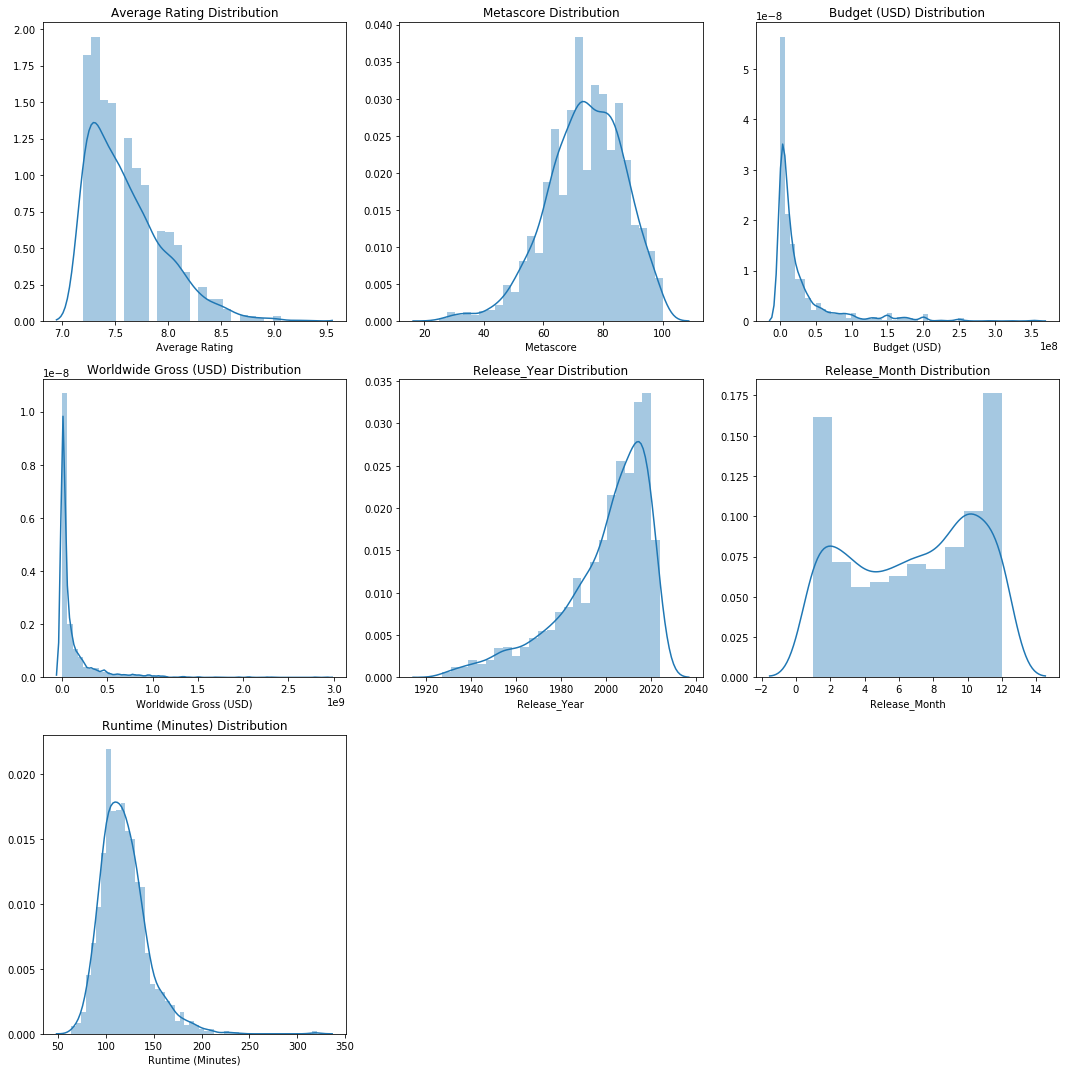

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc các cột numeric
numeric_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

# Tính toán số lượng subplot cần thiết
n = (len(numeric_cols) + 2) // 3
fig, axes = plt.subplots(n, 3, figsize=(15, n * 5))
axes = axes.flatten()

# Vẽ biểu đồ phân phối cho từng cột numeric
for i, col in enumerate(numeric_cols):
    sns.distplot(df[col], ax=axes[i], kde=True)  # Thay histplot bằng distplot
    axes[i].set_title(f"{col} Distribution")

# Ẩn các subplot thừa
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Xác định tầm quan trọng của các biến đầu vào đối với biến mục tiêu Worldwide Gross (USD) bằng mô hình Random Forest.

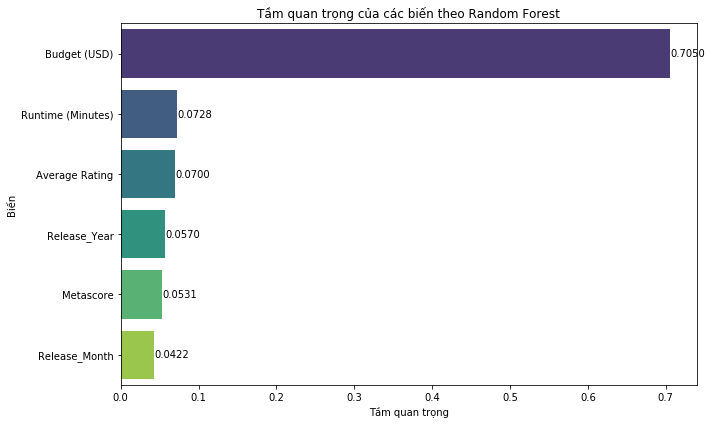

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

# Đặt biến mục tiêu
target = "Worldwide Gross (USD)"

# Chọn các biến độc lập (X) — loại bỏ cột mục tiêu
X_cols = [col for col in df.columns if col != target]
X = df[X_cols]
y = df[target]

# Chỉ dùng dữ liệu số
X = X.select_dtypes(exclude="object")

# Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Lấy tầm quan trọng của các biến
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ với nhãn giá trị
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")

# Thêm giá trị trên từng bar
for i, (importance, feature) in enumerate(zip(importance_df["Importance"], importance_df["Feature"])):
    ax.text(importance + 0.0005, i, f"{importance:.4f}", va='center')

plt.title("Tầm quan trọng của các biến theo Random Forest")
plt.xlabel("Tầm quan trọng")
plt.ylabel("Biến")
plt.tight_layout()
plt.show()

**Budget là biến có tầm ảnh hưởng áp đảo trong mô hình, chiếm 70% trọng số. Các biến khác chỉ đóng vai trò hỗ trợ với tầm ảnh hưởng tương đối nhỏ.**



In [118]:
print(df.describe())

       Average Rating  Metascore  Budget (USD)  Worldwide Gross (USD)  \
count          1926.0     1926.0        1926.0                 1926.0   
mean              7.6       74.0    29399945.0            125942008.5   
std               0.4       12.9    46594507.7            254748259.0   
min               7.2       25.0          12.5                   19.0   
25%               7.3       66.0     3225000.0              4747928.8   
50%               7.5       75.0    11353293.7             29839267.0   
75%               7.8       83.0    31000000.0            120604751.2   
max               9.3      100.0   356000000.0           2923706026.0   

       Release_Year  Release_Month  Runtime (Minutes)  
count        1926.0         1926.0             1926.0  
mean         1999.2            6.8              119.3  
std            20.3            3.6               24.9  
min          1927.0            1.0               64.0  
25%          1989.0            3.0              102.0  
50%   

# Tương quan giữa các biến với Worldwide Gross 

Average Rating       0.2
Metascore           -0.0
Budget (USD)         0.8
Release_Year         0.2
Release_Month        0.0
Runtime (Minutes)    0.2
Name: Worldwide Gross (USD), dtype: float64


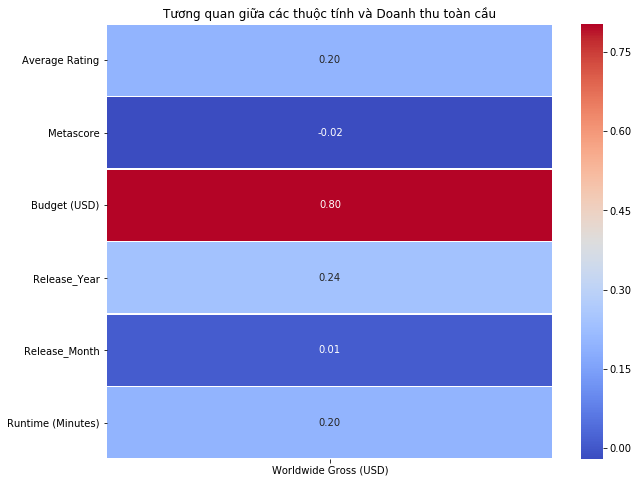

In [119]:
#TÍNH TOÁN MA TRẬN TƯƠNG QUAN 
correlation_matrix = df.corr()

#CHỈ LẤY TƯƠNG QUAN CỦA CÁC THUỘC TÍNH VỚI "Worldwide Gross"
correlation_gross = correlation_matrix.loc["Worldwide Gross (USD)"].drop("Worldwide Gross (USD)")
print(correlation_gross)

#VẼ BIỂU ĐỒ HEATMAP CHỈ HIỂN THỊ MỐI QUAN HỆ VỚI "Worldwide Gross"
plt.figure(figsize=(10,8))

sns.heatmap(correlation_gross.to_frame(), annot=True, 
            cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Thêm tiêu đề
plt.title("Tương quan giữa các thuộc tính và Doanh thu toàn cầu")
plt.show()

**Biến Budget có tương quan rất mạnh với doanh thu toàn cầu (Worldwide Gross), với hệ số 0.8. Các biến còn lại có tương quan yếu (≈ 0.2), và Metascore, Release_Month hầu như không có ảnh hưởng tuyến tính.**

## KẾT LUẬN

1. **Budget** là yếu tố **chính** ảnh hưởng đến **doanh thu toàn cầu** (*Worldwide Gross*). Điều này được củng cố bởi cả hai nguồn:
    - **Tầm quan trọng rất cao:** `0.7048`
    - **Tương quan mạnh:** `0.8`


2. Các biến như **Runtime**, **Average Rating** và **Release Year** có **tầm quan trọng vừa phải** và **tương quan yếu đến trung bình** (~`0.2`), cho thấy:
    - Chúng có ảnh hưởng nhất định đến doanh thu,
    - Nhưng **không đủ mạnh để dự đoán doanh thu một cách độc lập**.
    

3. **Metascore** và **Release Month** có **vai trò rất nhỏ**, có thể loại bỏ:
    - **Tương quan gần bằng 0** → không có quan hệ tuyến tính rõ ràng với *Worldwide Gross*.
    - Tuy nhiên, trong **Random Forest**, **Metascore** vẫn có tầm ảnh hưởng phi tuyến nhẹ (`0.0531`), cho thấy mô hình có thể **học được các mối quan hệ phức tạp** mà tương quan tuyến tính như Pearson không phát hiện được.


## Detect and replace outliers with upper and lower bounds

In [120]:
df.head(3)

,Title,Average Rating,Metascore,Budget (USD),Worldwide Gross (USD),Release_Year,Release_Month,Runtime (Minutes),Director_grouped,Writer_grouped,Country of Origin_grouped,Languages_grouped
0,The Shawshank Redemption,9.3,82.0,25000000.0,29332133.0,1994,10,142,Other,Other,United States,English
2,The Godfather,9.2,100.0,6000000.0,250342198.0,1978,1,175,Other,Other,United States,Other
7,The Dark Knight,9.0,84.0,185000000.0,1009053678.0,2008,7,152,Christopher Nolan,Other,"United States, United Kingdom",Other


Numeric features: ['Average Rating', 'Metascore', 'Runtime (Minutes)', 'Budget (USD)', 'Worldwide Gross (USD)', 'Release_Year', 'Release_Month']



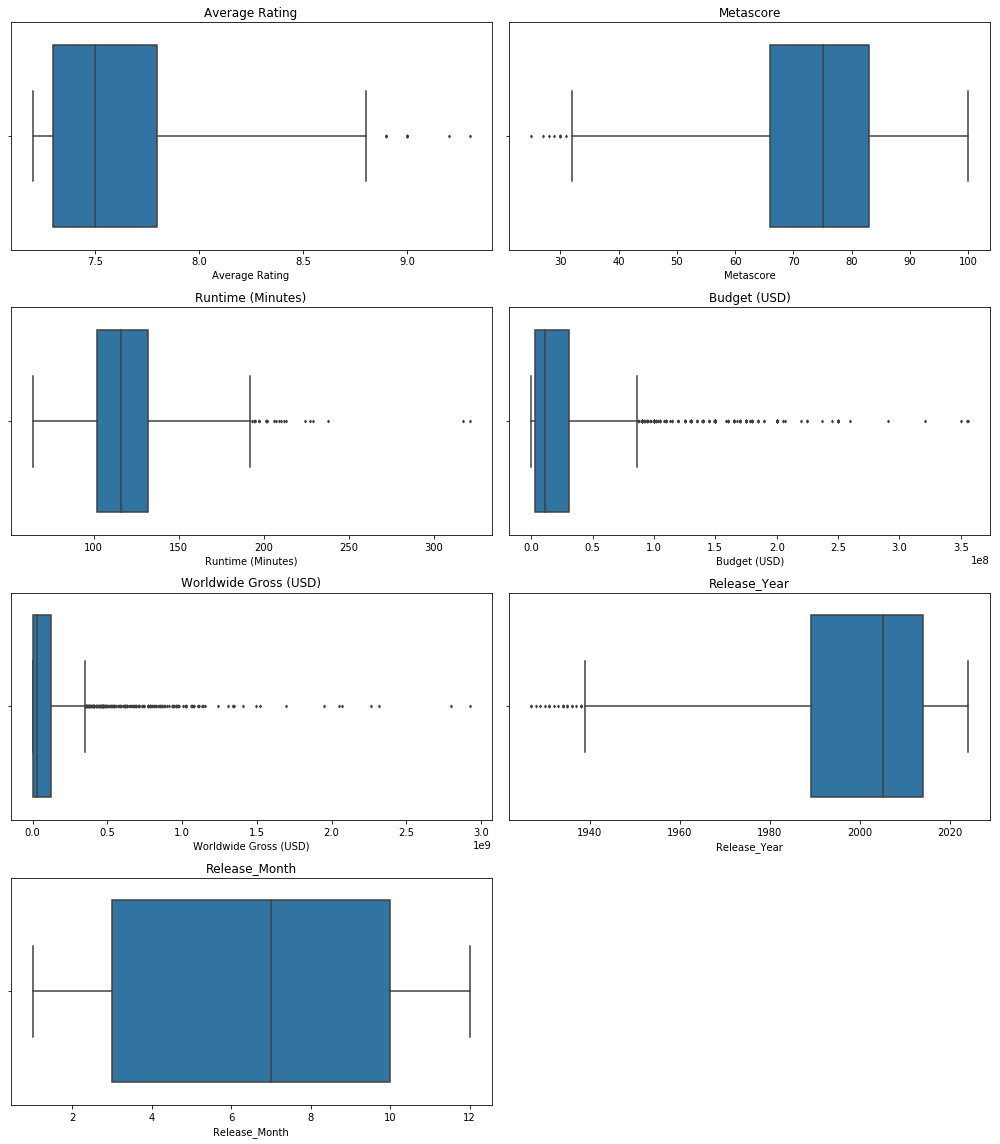

In [121]:
# KIỂM TRA OUTLIERS TRONG CÁC CỘT SỐ BẰNG CÁCH VẼ BIỂU ĐỒ HỘP (BOXPLOT)

numeric_cols = ['Average Rating', 'Metascore', 'Runtime (Minutes)', 'Budget (USD)', 'Worldwide Gross (USD)', 'Release_Year', 'Release_Month']
    # Chọn các cột số để kiểm tra outliers
print(f"Numeric features: {numeric_cols}\n")

# tạo 1 lưới biểu đồ để chứa tất cả các boxplot
n = (len(numeric_cols) + 1) // 2  # Cộng 1 để làm tròn lên
fig, axes = plt.subplots(n, 2, figsize=(14, n * 4))
axes = axes.flatten()

# Vẽ boxplot cho từng cột số
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], orient="h", ax=axes[i], whis=2, fliersize=2)
    axes[i].set_title(col)

# Ẩn các ô trống còn lại trong grid nếu số biểu đồ < số khung trục.
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Hiển thị biểu đồ gọn gàng, tránh đè chữ.
plt.tight_layout()
plt.show()

In [122]:
# HÀM XÁC ĐỊNH NGƯỠNG OUTLIER TRONG CÁC CỘT SỐ

def outlier_thresholds(df, col, q1=0.25, q3=0.75, verbose=False):
    quartile1 = df[col].quantile(q1)   # Lấy Q1 (mặc định là phần tử thứ 25%)
    quartile3 = df[col].quantile(q3)   # Lấy Q3 (mặc định là phần tử thứ 75%)
    iqr = quartile3 - quartile1        # IQR = Q3 - Q1
    
    upper_bound = quartile3 + 1.5 * iqr # Tính ngưỡng trên
    lower_bound = quartile1 - 1.5 * iqr # Tính ngưỡng dưới
         # Các giá trị lớn hơn upper_bound hoặc nhỏ hơn lower_bound được coi là outliers.

    if verbose:
        print(f"Ngưỡng dưới và ngưỡng trên của cột `{col}` là ({lower_bound:.3f}, {upper_bound:.3f}) , và khoảng tứ phân vị (IQR) là: {iqr:.3f}")
        # In ra các ngưỡng và IQR cho cột hiện tại.

    return lower_bound, upper_bound



# SỬ DỤNG outlier_thresholds() ĐỂ ĐẾM SỐ OUTLIERS TRONG CÁC CỘT SỐ
def check_outliers(df, col, q1=0.25, q3=0.75, verbose=False):
    lower_bound, upper_bound = outlier_thresholds(df, col, q1, q3, verbose)
    outliers_count = df[(df[col] > upper_bound) | (df[col] < lower_bound)][col].count()
    
    if verbose:
        print(f"`Cột {col}` chứa {outliers_count} giá trị ngoại lai (outliers).")
    
    outliers_present = bool(outliers_count > 0)
        # Nếu có ít nhất 1 outlier → Trả về True
        # Nếu không có → False
    
    return outliers_present

In [123]:
# KIỂM TRA CÁC CỘT SỐ CÓ OUTLIERS

cols_with_outliers = []
    # Tạo danh sách rỗng để lưu các cột có chứa outliers

# Duyệt qua từng cột số trong danh sách numeric_cols
for col in numeric_cols:
    if check_outliers(df, col, q1=0.2, q3=0.8, verbose=True):
        print()
        cols_with_outliers.append(col)

Ngưỡng dưới và ngưỡng trên của cột `Average Rating` là (6.400, 8.800) , và khoảng tứ phân vị (IQR) là: 0.600
`Cột Average Rating` chứa 10 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Metascore` là (32.500, 116.500) , và khoảng tứ phân vị (IQR) là: 21.000
`Cột Metascore` chứa 10 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Runtime (Minutes)` là (46.000, 190.000) , và khoảng tứ phân vị (IQR) là: 36.000
`Cột Runtime (Minutes)` chứa 27 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Budget (USD)` là (-53750000.000, 96250000.000) , và khoảng tứ phân vị (IQR) là: 37500000.000
`Cột Budget (USD)` chứa 157 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Worldwide Gross (USD)` là (-249638141.500, 422324686.500) , và khoảng tứ phân vị (IQR) là: 167990707.000
`Cột Worldwide Gross (USD)` chứa 164 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Release_Year` là (1938.500, 2062.500) , và khoảng tứ phâ

In [124]:
def replace_outliers_with_thresholds(df, col):
    lower_bound, upper_bound = outlier_thresholds(df, col, q1=0.2, q3=0.8)
        # Tính toán ngưỡng dưới và trên cho cột hiện tại
    
    df.loc[df[col] < lower_bound, col] = lower_bound
        # Thay thế các giá trị nhỏ hơn ngưỡng dưới bằng ngưỡng dưới
    df.loc[df[col] > upper_bound, col] = upper_bound
        # Thay thế các giá trị lớn hơn ngưỡng trên bằng ngưỡng trên


# THAY THẾ OUTLIERS TRONG CÁC CỘT CÓ OUTLIERS
for col in cols_with_outliers:
    replace_outliers_with_thresholds(df, col)

# KIỂM TRA LẠI CÁC OUTLIERS SAU KHI ĐÃ THAY THẾ
for col in cols_with_outliers:
    check_outliers(df, col, q1=0.2, q3=0.8, verbose=True)
    print()

Ngưỡng dưới và ngưỡng trên của cột `Average Rating` là (6.400, 8.800) , và khoảng tứ phân vị (IQR) là: 0.600
`Cột Average Rating` chứa 0 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Metascore` là (32.500, 116.500) , và khoảng tứ phân vị (IQR) là: 21.000
`Cột Metascore` chứa 0 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Runtime (Minutes)` là (46.000, 190.000) , và khoảng tứ phân vị (IQR) là: 36.000
`Cột Runtime (Minutes)` chứa 0 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Budget (USD)` là (-53750000.000, 96250000.000) , và khoảng tứ phân vị (IQR) là: 37500000.000
`Cột Budget (USD)` chứa 0 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Worldwide Gross (USD)` là (-249638141.500, 422324686.500) , và khoảng tứ phân vị (IQR) là: 167990707.000
`Cột Worldwide Gross (USD)` chứa 0 giá trị ngoại lai (outliers).

Ngưỡng dưới và ngưỡng trên của cột `Release_Year` là (1938.500, 2062.500) , và khoảng tứ phân vị (I

## phân tích tương quan giữa Budget và Worldwide Gross

c:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


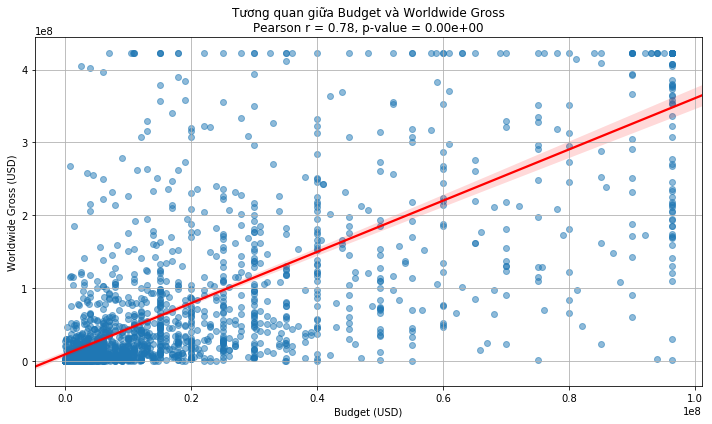

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

budget = df["Budget (USD)"]
gross = df["Worldwide Gross (USD)"]

# Tính hệ số tương quan Pearson
correlation, p_value = pearsonr(budget, gross)

# Vẽ biểu đồ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.regplot(x=budget, y=gross, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title(f"Tương quan giữa Budget và Worldwide Gross\nPearson r = {correlation:.2f}, p-value = {p_value:.2e}")
plt.xlabel("Budget (USD)")
plt.ylabel("Worldwide Gross (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Phân tích:**
- Pearson correlation coefficient (r): Giá trị xấp xỉ 0.75, cho thấy mối tương quan dương mạnh giữa ngân sách và doanh thu.
    - Điều này có nghĩa là phim có ngân sách cao thường có xu hướng đạt doanh thu cao.
- p-value rất nhỏ (≈ 0), chứng tỏ mối tương quan là có ý nghĩa thống kê.
- Đường hồi quy (màu đỏ) thể hiện xu hướng tuyến tính giữa hai biến.

**=> Kết luận:**
Càng đầu tư nhiều ngân sách, khả năng thu về doanh thu cao càng lớn. Tuy nhiên, vẫn có một số điểm dữ liệu nằm xa khỏi đường xu hướng — cho thấy có một số phim ngân sách cao nhưng doanh thu thấp (hoặc ngược lại), tức là vẫn có rủi ro và ngoại lệ.

## phân tích tương quan giữa Runtime (thời lương phim) và Worldwide Gross

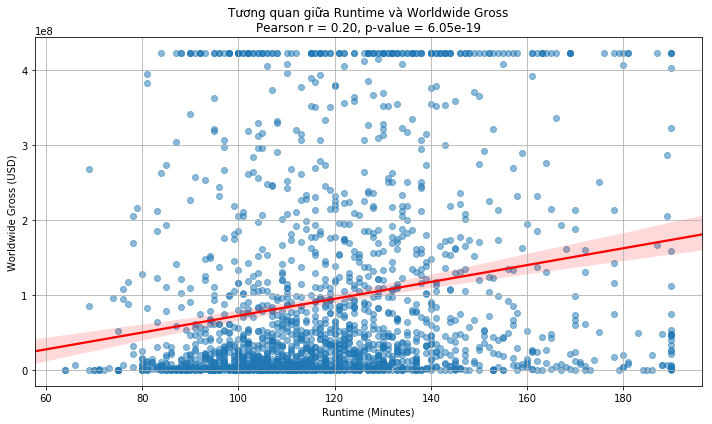

In [126]:
runtime = df["Runtime (Minutes)"]
gross = df["Worldwide Gross (USD)"]

# Tính hệ số tương quan Pearson
correlation, p_value = pearsonr(runtime, gross)

# Vẽ biểu đồ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.regplot(x=runtime, y=gross, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title(f"Tương quan giữa Runtime và Worldwide Gross\nPearson r = {correlation:.2f}, p-value = {p_value:.2e}")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Worldwide Gross (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Phân tích:**
- Pearson r = 0.20:
    - Mức độ tương quan dương yếu (positive, nhưng yếu).
    - Nghĩa là phim dài hơn có xu hướng doanh thu cao hơn, nhưng mối liên hệ không mạnh.
- Giá trị p-value = 6.05e-19 rất nhỏ, điều này chứng tỏ mối tương quan trên có ý nghĩa thống kê.
- Đường hồi quy màu đỏ thể hiện xu hướng chung: phim có thời lượng dài hơn có xu hướng đạt doanh thu cao hơn, tuy nhiên sự phân tán dữ liệu lớn cho thấy mối liên hệ này không mạnh.
- Dễ nhận thấy có nhiều phim có thời lượng tương đương nhưng doanh thu chênh lệch rất lớn, cho thấy nhiều yếu tố khác cũng đang tác động đến doanh thu.

**=> Kết luận:**
Mặc dù có mối tương quan tuyến tính dương **có ý nghĩa thống kê** giữa thời lượng phim và doanh thu toàn cầu, nhưng hệ số tương quan nhỏ (r = 0.20) cho thấy **thời lượng không phải là yếu tố quyết định chính**. Các yếu tố khác như ngân sách, thể loại, đánh giá người xem hay chiến dịch quảng bá có thể ảnh hưởng nhiều hơn đến thành công của một bộ phim.

## phân tích tương quan giữa Average Rating và Worldwide Gross

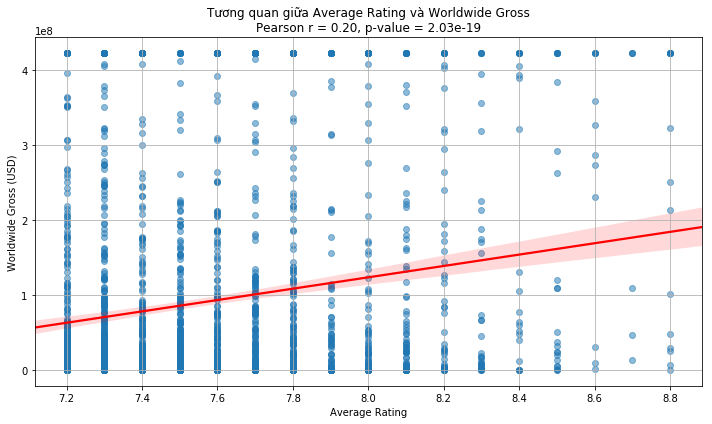

In [127]:
rate = df["Average Rating"]
gross = df["Worldwide Gross (USD)"]

# Tính hệ số tương quan Pearson
correlation, p_value = pearsonr(rate, gross)

# Vẽ biểu đồ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.regplot(x=rate, y=gross, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title(f"Tương quan giữa Average Rating và Worldwide Gross\nPearson r = {correlation:.2f}, p-value = {p_value:.2e}")
plt.xlabel("Average Rating")
plt.ylabel("Worldwide Gross (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Phân tích:**
- Hệ số tương quan Pearson r = 0.20, cho thấy có mối tương quan tuyến tính dương yếu giữa điểm đánh giá trung bình và doanh thu toàn cầu.
- Giá trị p-value = 2.03e-19, cực kỳ nhỏ → mối tương quan có ý nghĩa thống kê cao.
- Đường hồi quy màu đỏ cho thấy xu hướng: phim được đánh giá cao hơn có xu hướng đạt doanh thu cao hơn, nhưng mối liên hệ này vẫn không mạnh.
- Dữ liệu phân tán cho thấy có những phim có cùng mức điểm nhưng doanh thu lại rất khác nhau, cho thấy yếu tố Average Rating chỉ góp phần nhỏ vào việc ảnh hưởng đến doanh thu.

**=> Kết luận:**
Điểm đánh giá trung bình có mối tương quan dương yếu với doanh thu toàn cầu và có ý nghĩa thống kê. Tuy nhiên, mức độ ảnh hưởng không lớn, cho thấy rating chỉ là một trong nhiều yếu tố tác động đến doanh thu phim.


## phân tích tương quan giữa Release Year và Worldwide Gross

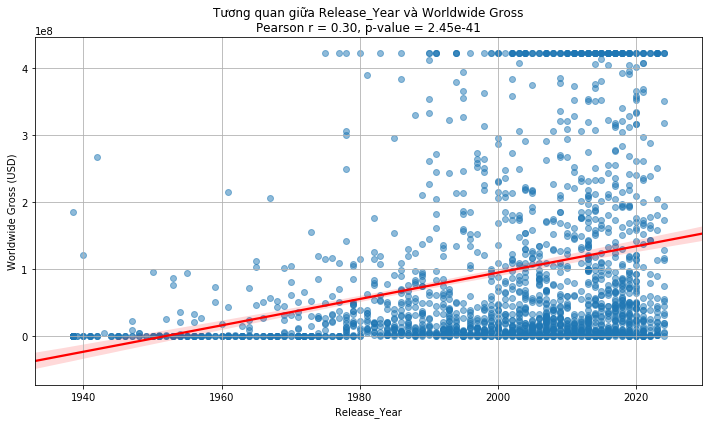

In [128]:
year = df["Release_Year"]
gross = df["Worldwide Gross (USD)"]

# Tính hệ số tương quan Pearson
correlation, p_value = pearsonr(year, gross)

# Vẽ biểu đồ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.regplot(x=year, y=gross, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title(f"Tương quan giữa Release_Year và Worldwide Gross\nPearson r = {correlation:.2f}, p-value = {p_value:.2e}")
plt.xlabel("Release_Year")
plt.ylabel("Worldwide Gross (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Phân tích:**
- Đồ thị phân tán cho thấy mối quan hệ yếu dương giữa năm phát hành và doanh thu toàn cầu của phim. 
- Mặc dù có mối tương quan dương có ý nghĩa thống kê (r = 0.30), nhưng sự phân tán lớn của dữ liệu cho thấy năm phát hành không phải là yếu tố quyết định thành công phòng vé. 
- Các phim gần đây thường có doanh thu cao hơn nhờ lạm phát, thị trường toàn cầu mở rộng và ngân sách marketing lớn. Tuy nhiên, vẫn có nhiều bộ phim hiện đại không đạt được doanh thu cao, trong khi một số bộ phim trong lịch sử lại có thành công vượt trội.

**=> kết luận:**
Mặc dù có mối tương quan dương giữa năm phát hành và doanh thu toàn cầu, nhưng mối quan hệ này khá yếu. Sự gia tăng doanh thu của các phim gần đây chủ yếu do các yếu tố như lạm phát và thị trường toàn cầu mở rộng. Tuy nhiên, năm phát hành không phải là yếu tố dự đoán mạnh mẽ thành công phòng vé, và số lượng phim toàn cầu cũng tăng lên trong các thập kỷ gần đây.